<a href="https://colab.research.google.com/github/sulagna206/breast-cancer-prediction/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# This project is an attempt to predict the class of Breast Cancer given the various test conditions.
*Independent variables given - mean_radius , mean_texture , mean_perimeter , mean_area , mean_smoothness.*

*Dependent / Target Variable - diagnosis (0-Malignant , 1-Benign)*


# Basic EDA of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
cancer = pd.read_csv('https://sulagna206.github.io/breast-cancer-prediction/Breast_cancer_data.csv')

In [3]:
cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
cancer.shape

(569, 6)

In [5]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [6]:
cancer.isnull().sum() #no null values

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [7]:
cancer.groupby('diagnosis').count()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
diagnosis,,,,,
0,212,212,212,212,212
1,357,357,357,357,357


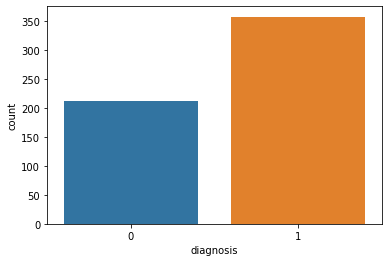

In [8]:
sns.countplot(x=cancer['diagnosis'])
plt.show()

In [9]:
cancer.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


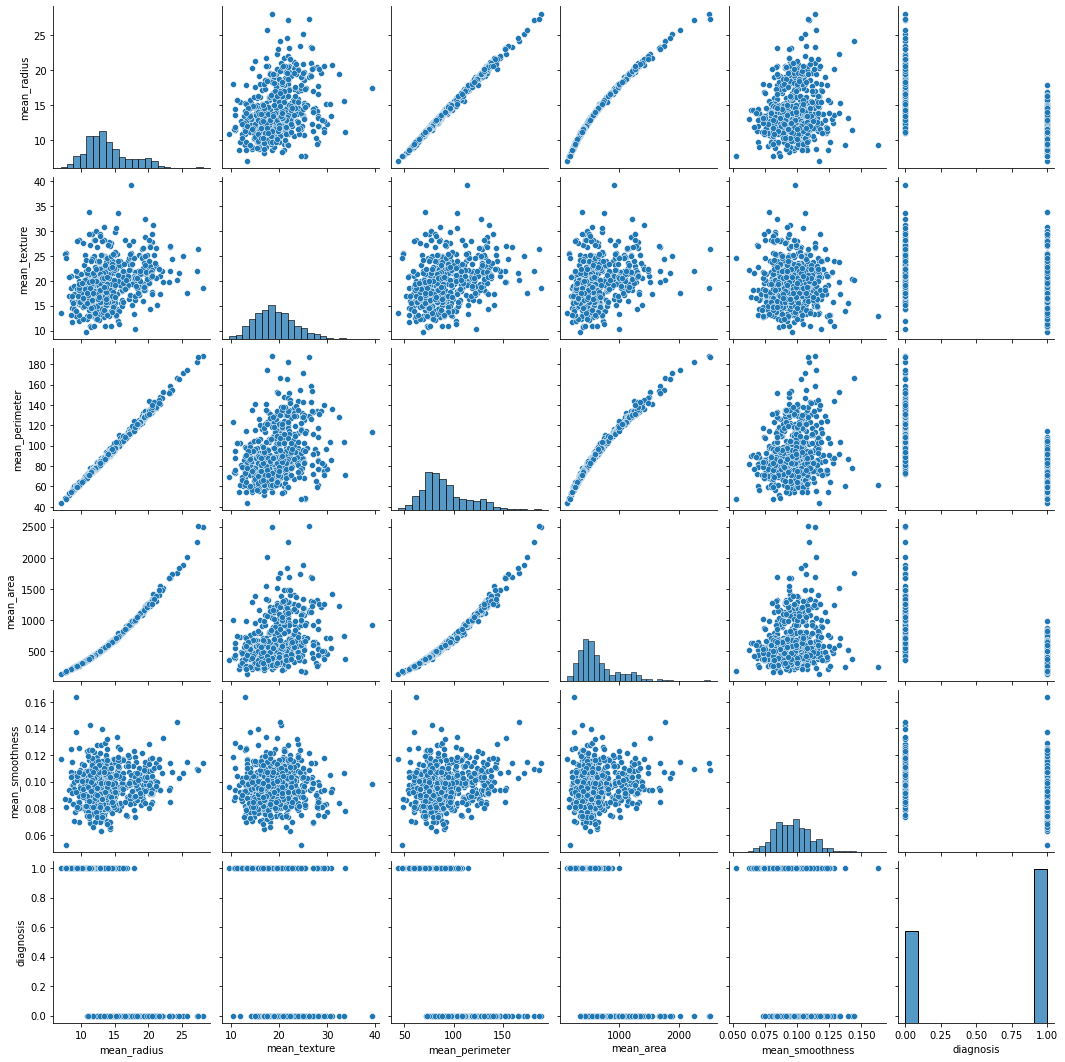

In [10]:
sns.pairplot(cancer)
plt.show()

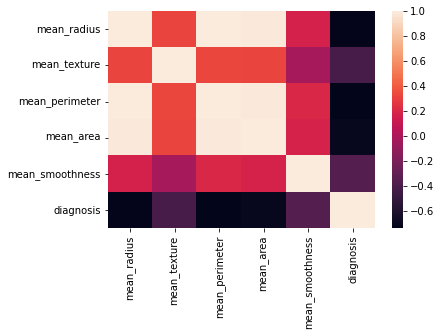

In [11]:
cor=cancer.corr()
sns.heatmap(cor)
plt.show()

In [12]:
X=cancer.drop('diagnosis',axis=1)
Y=cancer[['diagnosis']]

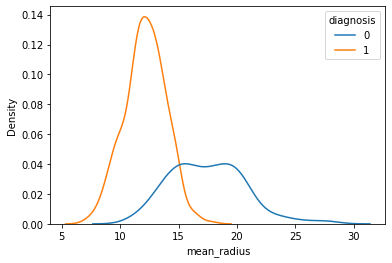

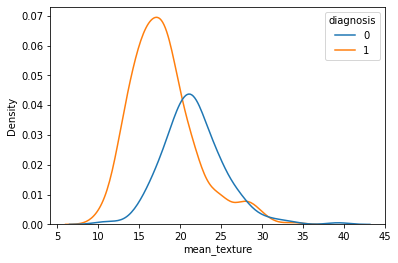

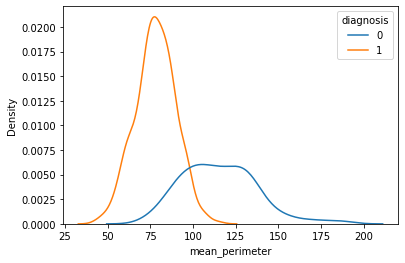

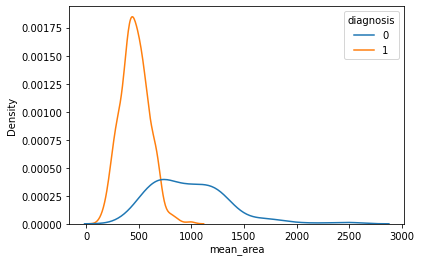

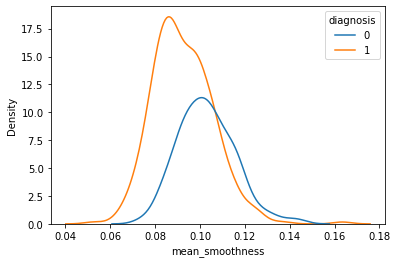

In [13]:
for i in X.columns:
  sns.kdeplot(x=cancer[i],hue=cancer['diagnosis'])
  plt.show()

# Data preparation
*Here we divide the dataset into training and testing set. Then in this section training set is cleaned by feature selection and outliers handling. And finally , Scaling is done on training set*

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

*Now lets work with the training set*

In [15]:
X_train.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
408,17.99,20.66,117.80,991.7,0.10360
4,20.29,14.34,135.10,1297.0,0.10030
307,9.00,14.40,56.36,246.3,0.07005
386,12.21,14.09,78.78,462.0,0.08108
404,12.34,14.95,78.29,469.1,0.08682


In [16]:
X_train.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
count,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.213492,19.354374,92.572791,664.583077,0.096372
std,3.617912,4.399626,24.993837,362.603052,0.013746
min,6.981000,9.710000,43.790000,143.500000,0.052630
25%,11.705000,16.170000,75.085000,421.950000,0.086730
50%,13.400000,18.870000,86.870000,551.100000,0.096390
75%,16.090000,21.830000,105.400000,801.550000,0.104900
max,28.110000,39.280000,188.500000,2501.000000,0.163400


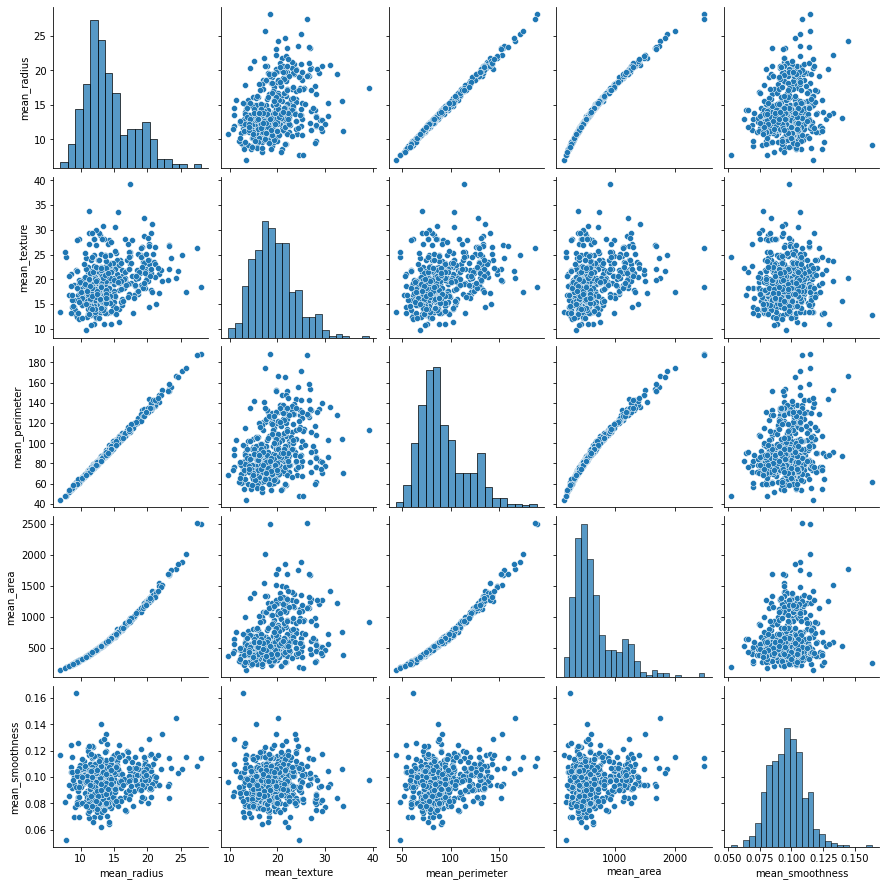

In [17]:
sns.pairplot(X_train)

*We find high dependency between radius,perimeter and area , which is expected. Thus, we shall drop the overlapping features keeping only the valuable column.*

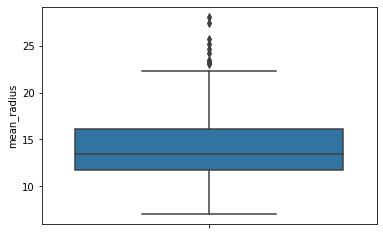

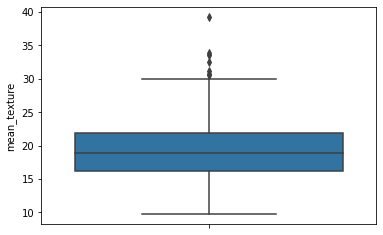

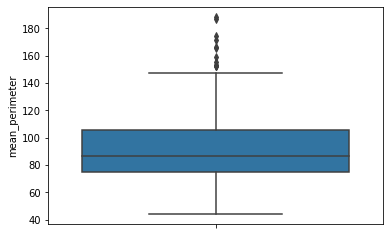

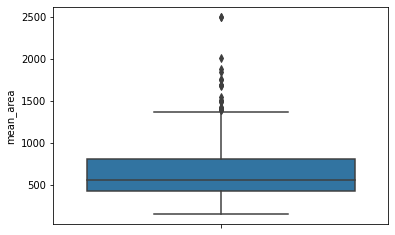

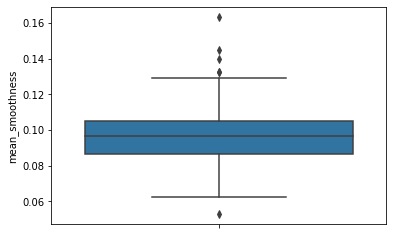

In [18]:
for i in X.columns:
  sns.boxplot(y=X_train[i])
  plt.show()

*We find high outliers in radius and area as compared to perimeter. So , we will keep perimeter among the overlapping features.*

In [19]:
X_train = X_train.drop(['mean_area','mean_radius'],axis=1)
features = X_train.columns

In [20]:
features = list(features)

*Handling Outliers*

In [21]:
from scipy import stats
iqr={}
med={}
for i in X_train.columns:
  iqr[i] = X_train[i].quantile(0.75)+1.5*stats.iqr(X_train[i],interpolation='midpoint')
for i in X_train.columns:
  med[i] = X_train[i].median()
print(iqr)
print(med)

{'mean_texture': 30.319999999999993, 'mean_perimeter': 150.8725, 'mean_smoothness': 0.13215499999999997}
{'mean_texture': 18.87, 'mean_perimeter': 86.87, 'mean_smoothness': 0.09639}


*Outliers imputation on training set and replacing with median*

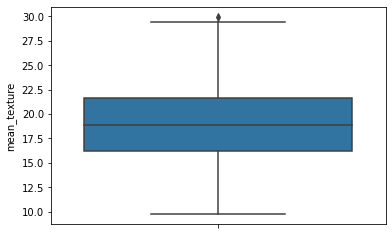

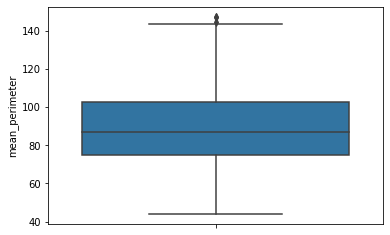

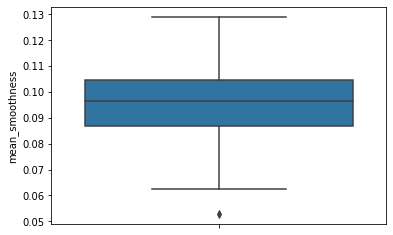

In [22]:
for i in X_train.columns:
  X_train[i]=X_train[i].apply(lambda x: med[i] if (x>iqr[i]) else x)
for i in X_train.columns:
  sns.boxplot(y=X_train[i])
  plt.show()

*Scaling the training set*

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [24]:
X_scale = sc.fit_transform(X_train)

# Data preparation of test set
*Here we have assume that test set is available for data cleaning. Therefore , we clean the test set and handle the outliers before feeding and predicting on the models.*

*Now , let's work on cleaning the test set*

In [25]:
X_test = X_test[features]

In [26]:
X_test.describe()

,mean_texture,mean_perimeter,mean_smoothness
count,114.000000,114.000000,114.000000
mean,19.031316,89.559298,0.096314
std,3.889991,21.230349,0.015333
min,10.380000,48.340000,0.068280
25%,16.210000,75.222500,0.084943
50%,18.805000,85.215000,0.092775
75%,21.475000,97.730000,0.106900
max,29.810000,182.100000,0.142500


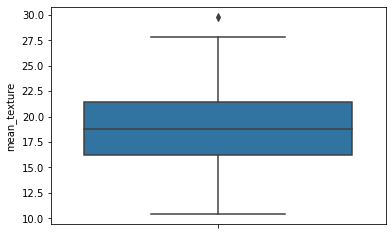

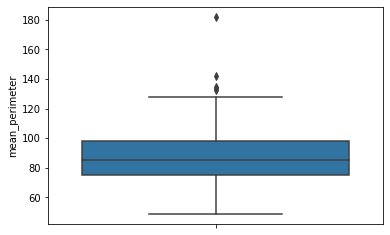

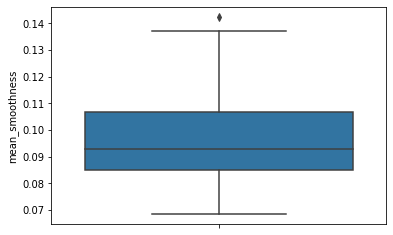

In [27]:
for i in X_test.columns:
  sns.boxplot(y=X_test[i])
  plt.show()

*Handling Outliers*

In [28]:
from scipy import stats
iqr={}
med={}
for i in X_test.columns:
  iqr[i] = X_test[i].quantile(0.75)+1.5*stats.iqr(X_test[i],interpolation='midpoint')
for i in X_test.columns:
  med[i] = X_test[i].median()
print(iqr)
print(med)

{'mean_texture': 29.305, 'mean_perimeter': 131.3075, 'mean_smoothness': 0.1394275}
{'mean_texture': 18.805, 'mean_perimeter': 85.215, 'mean_smoothness': 0.092775}


*Replacing outliers with median along with boxplot for visualization*

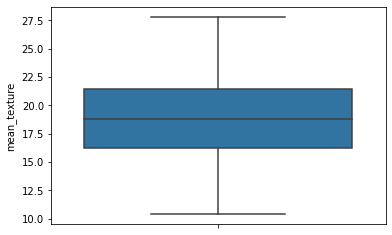

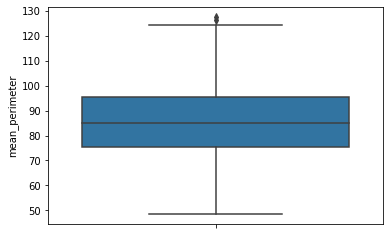

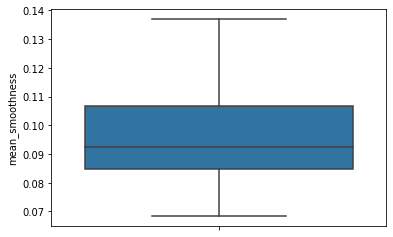

In [29]:
for i in X_test.columns:
  X_test[i]=X_test[i].apply(lambda x: med[i] if (x>iqr[i]) else x)
for i in X_test.columns:
  sns.boxplot(y=X_test[i])
  plt.show()

*Transform test set by scaling*

In [30]:
X_test_scale = sc.transform(X_test)




# Trying a Logistic Regression Model

*Here, we fit the training data into the model and make the model learn it*

In [31]:
from sklearn.linear_model import LogisticRegression
lg1 = LogisticRegression()

In [32]:
model = lg1.fit(X_scale,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*Predicting values*

In [33]:
ypred = model.predict(X_test_scale)

*Model evaluation by confusion matrix, precision , recall and F1score*

In [34]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score
print(classification_report(Y_test,ypred))
print(confusion_matrix(Y_test,ypred))
print("F1 score:",f1_score(Y_test,ypred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        42
           1       0.90      0.96      0.93        72

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.90      0.90      0.90       114

[[34  8]
 [ 3 69]]
F1 score: 0.9261744966442952


*Well, we have got a preety good score and accuracy. The confusion matrix shoes that our model predicts a malignant case 34 times correctly and 8 times wrong. Also, the model predicts benign case correctly 69 times and 3 times wrong. The F1 score is 92%*

# Trying Naive Bayes classification

*For naive bayes let's check the distribution of various independent columns of training set*

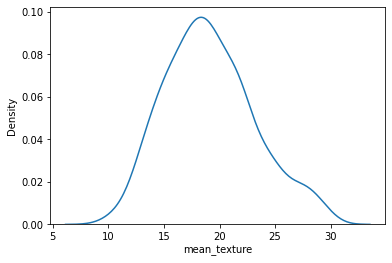

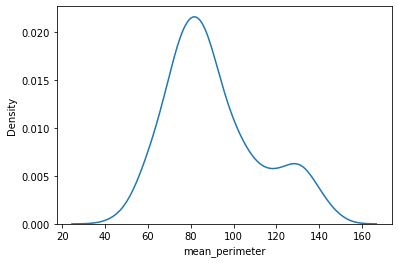

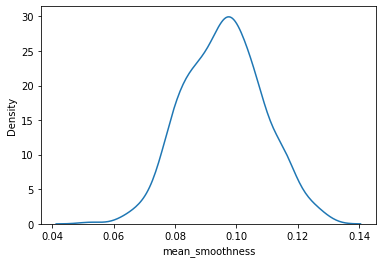

In [37]:
for i in X_train.columns:
  sns.kdeplot(X_train[i])
  plt.show()

*Almost all the columns have a normal distribution. So , here no transformation needed*

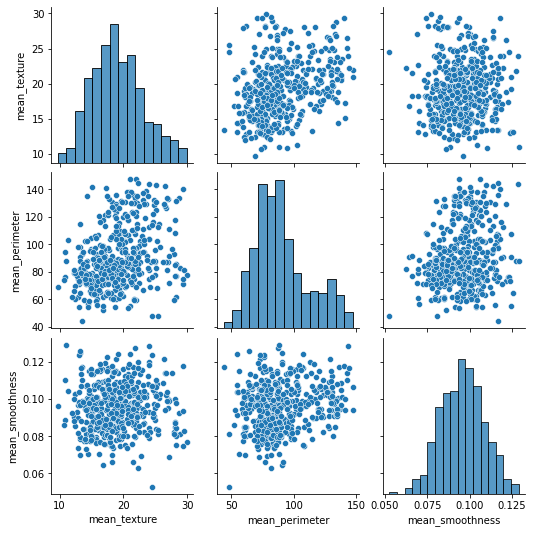

In [38]:
sns.pairplot(X_train)
plt.show()

*All the columns are independent of each other*

In [39]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_scale = s.fit_transform(X_train)

In [40]:
from sklearn.naive_bayes import GaussianNB
g = GaussianNB()

In [41]:
g.fit(X_scale,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
ypred_NB = g.predict(X_test_scale)

*Model evaluation*

In [44]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score
print(classification_report(Y_test,ypred_NB))
print(confusion_matrix(Y_test,ypred_NB))
print(f1_score(Y_test,ypred_NB))

              precision    recall  f1-score   support

           0       0.96      0.64      0.77        42
           1       0.83      0.99      0.90        72

    accuracy                           0.86       114
   macro avg       0.89      0.81      0.84       114
weighted avg       0.88      0.86      0.85       114

[[27 15]
 [ 1 71]]
0.8987341772151899


*Here we receive a slightly lower F1score but the confusion matrix shows that our model predicted all 71 cases of benign correctly and 1 incorrectly, but predicted only 27 cases of malignant correctly and 15 incorrectly*

# Trying KNN classifier

*Let's try KNN here to check if the model improves*

In [46]:
from sklearn.neighbors import KNeighborsClassifier

*Let's try to choose a k value. Mostly we choose square root of total observations*

In [52]:
import math
k_value = math.sqrt(X_train.shape[0])
k_value = int(k_value)

In [53]:
kn = KNeighborsClassifier(n_neighbors=k_value,p=2,metric='euclidean')

In [54]:
kn.fit(X_scale,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [55]:
ypred_kn = kn.predict(X_test_scale)

*Model evaluation*

In [56]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score
print(classification_report(Y_test,ypred_kn))
print(confusion_matrix(Y_test,ypred_kn))
print(f1_score(Y_test,ypred_kn))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78        42
           1       0.85      0.93      0.89        72

    accuracy                           0.85       114
   macro avg       0.85      0.82      0.83       114
weighted avg       0.85      0.85      0.85       114

[[30 12]
 [ 5 67]]
0.8874172185430463


*There is no such improvement in the model. However, in the confusion matrix it shows that 30 cases of malignant were correctly predicted and 12 were incorrect. 67 cases of benign were correctly predicted and 5 were incorrect*

*Finally here we can observe that Logistic Regression has the overall better F1 score than others. However, Naive Bayes has also done a great work in predicting the benign cases correctly. I haven't gone through ensemble techniques . Will try to make a better model by ensembling techniques if possible*